In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

In [2]:
mat_train = scipy.io.loadmat('lists/train_list.mat')

In [3]:
mat_test = scipy.io.loadmat('lists/test_list.mat')

In [7]:
mat_test_2 = scipy.io.loadmat('dataset/test/test_data.mat')

In [8]:
mat_test_2

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Mar 28 12:07:09 2012',
 '__version__': '1.0',
 '__globals__': [],
 'test_info': array([[(array([[array(['n02085620-Chihuahua/n02085620_2650.jpg'], dtype='<U38')],
                [array(['n02085620-Chihuahua/n02085620_4919.jpg'], dtype='<U38')],
                [array(['n02085620-Chihuahua/n02085620_1765.jpg'], dtype='<U38')],
                ...,
                [array(['n02116738-African_hunting_dog/n02116738_3635.jpg'], dtype='<U48')],
                [array(['n02116738-African_hunting_dog/n02116738_2988.jpg'], dtype='<U48')],
                [array(['n02116738-African_hunting_dog/n02116738_6330.jpg'], dtype='<U48')]],
               dtype=object), array([[array(['n02085620-Chihuahua/n02085620_2650'], dtype='<U34')],
                [array(['n02085620-Chihuahua/n02085620_4919'], dtype='<U34')],
                [array(['n02085620-Chihuahua/n02085620_1765'], dtype='<U34')],
                ...,
                [a

In [10]:
mat_list

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct  9 08:36:13 2011',
 '__version__': '1.0',
 '__globals__': [],
 'file_list': array([[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')],
        [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')],
        [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]],
       dtype=object),
 'annotation_list': array([[array(['n02085620-Chihuahua/n02085620_5927'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_4441'], dtype='<U34')],
        [array(['n02085620-Chihuahua/n02085620_1502'], dtype='<U34')],
        ...,
        [array(['n02116738-African_hunting_dog/n02116738_6754'], dtype='<U44')],
      

In [ ]:
whos -file mydata.mat

In [76]:
from sklearn.datasets import load_files
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(data_folder):
    # data = load_files(data_folder)
    train_data = loadmat(f"{data_folder}/train_list.mat")
    print(type(train_data))
    train_file_list = train_data["file_list"]
    print(train_file_list)
    dog_files = train_file_list
    print(train_data['labels'])
    dog_targets = np_utils.to_categorical(np.array(train_data['labels']), 120)
    return dog_files, dog_targets

In [77]:
# load train, test, and validation datasets
train_files, train_targets = load_dataset('lists')
# valid_files, valid_targets = load_dataset('dataset/valid')
# test_files, test_targets = load_dataset('lists')

<class 'dict'>
[[array(['n02085620-Chihuahua/n02085620_5927.jpg'], dtype='<U38')]
 [array(['n02085620-Chihuahua/n02085620_4441.jpg'], dtype='<U38')]
 [array(['n02085620-Chihuahua/n02085620_1502.jpg'], dtype='<U38')]
 ...
 [array(['n02116738-African_hunting_dog/n02116738_6754.jpg'], dtype='<U48')]
 [array(['n02116738-African_hunting_dog/n02116738_9333.jpg'], dtype='<U48')]
 [array(['n02116738-African_hunting_dog/n02116738_2503.jpg'], dtype='<U48')]]
[1]


IndexError: index 120 is out of bounds for axis 1 with size 120

In [40]:
import numpy as np
from scipy.io import loadmat
from PIL import Image

def load_data(data_folder):
    train_data = loadmat(f"{data_folder}/train_list.mat")
    test_data = loadmat(f"{data_folder}/test_list.mat")
    train_file_list = train_data["file_list"]
    test_file_list = test_data["file_list"]

    train_images = []
    train_labels = []
    test_images = []
    test_labels = []

    for file_list in [train_file_list, test_file_list]:
        for file_path in file_list:
            # Extract the file path string from the nested array
            file_path = file_path[0]

            # Load the image from the file path
            image = Image.open("Images" + "/" + file_path[0])
            image = image.resize((299, 299))  # Resize the image to a fixed size
            image_array = np.array(image)

            # Extract the label from the file path
            class_name = file_path[0].split("/")[0]
            label = class_name.split("-")[-1]

            # Add the image and label to the appropriate list
            if file_list is train_file_list:
                train_images.append(image_array)
                train_labels.append(label)
            else:
                test_images.append(image_array)
                test_labels.append(label)

    return np.array(train_images), np.asarray(train_labels), np.array(test_images), np.asarray(test_labels)

In [41]:
train_images, train_labels, test_images, test_labels = load_data("lists")

In [47]:
train_images

array([[[[ 30,  23,   5],
         [ 30,  23,   5],
         [ 30,  23,   5],
         ...,
         [ 65,  49,  13],
         [ 65,  49,  13],
         [ 65,  49,  13]],

        [[ 30,  23,   5],
         [ 30,  23,   5],
         [ 30,  23,   5],
         ...,
         [ 65,  49,  13],
         [ 65,  49,  13],
         [ 65,  49,  13]],

        [[ 30,  23,   5],
         [ 30,  23,   5],
         [ 30,  23,   5],
         ...,
         [ 65,  49,  13],
         [ 65,  49,  13],
         [ 65,  49,  13]],

        ...,

        [[110, 121, 113],
         [113, 124, 116],
         [117, 130, 121],
         ...,
         [ 92, 114, 102],
         [ 91, 113, 101],
         [ 80, 102,  90]],

        [[115, 127, 125],
         [117, 129, 126],
         [118, 131, 127],
         ...,
         [ 82, 103,  94],
         [ 86, 107,  98],
         [ 83, 104,  95]],

        [[116, 130, 130],
         [117, 132, 129],
         [118, 133, 130],
         ...,
         [ 81, 102,  93],
        

In [6]:
df_train = pd.DataFrame(np.hstack((mat_train['file_list'], mat_train['annotation_list'],mat_train['labels'])), columns=['file name', 'annotation name','labels'])

In [7]:
df_train

,file name,annotation name,labels
0,[n02085620-Chihuahua/n02085620_5927.jpg],[n02085620-Chihuahua/n02085620_5927],1
1,[n02085620-Chihuahua/n02085620_4441.jpg],[n02085620-Chihuahua/n02085620_4441],1
2,[n02085620-Chihuahua/n02085620_1502.jpg],[n02085620-Chihuahua/n02085620_1502],1
3,[n02085620-Chihuahua/n02085620_1916.jpg],[n02085620-Chihuahua/n02085620_1916],1
4,[n02085620-Chihuahua/n02085620_13151.jpg],[n02085620-Chihuahua/n02085620_13151],1
...,...,...,...
11995,[n02116738-African_hunting_dog/n02116738_10614...,[n02116738-African_hunting_dog/n02116738_10614],120
11996,[n02116738-African_hunting_dog/n02116738_9282....,[n02116738-African_hunting_dog/n02116738_9282],120
11997,[n02116738-African_hunting_dog/n02116738_6754....,[n02116738-African_hunting_dog/n02116738_6754],120
11998,[n02116738-African_hunting_dog/n02116738_9333....,[n02116738-African_hunting_dog/n02116738_9333],120


In [4]:
df_test = pd.DataFrame(np.hstack((mat_test['file_list'], mat_test['annotation_list'],mat_test['labels'])), columns=['file name', 'annotation name','labels'])

(array([2400., 2400., 2400., 2400., 2400.]),
 array([  1. ,  24.8,  48.6,  72.4,  96.2, 120. ]),
 <BarContainer object of 5 artists>)

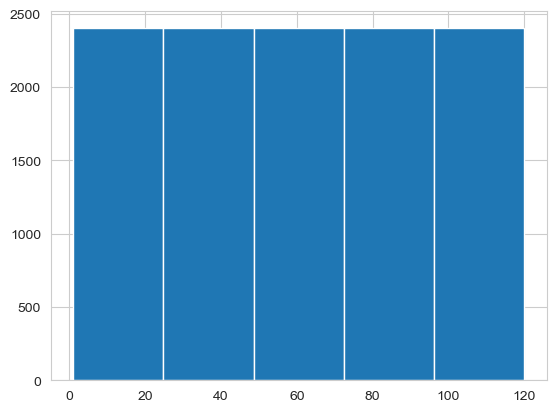

In [8]:
plt.hist(df_train['labels'], bins=5)

In [9]:
df_train.groupby('labels').count()

,file name,annotation name
labels,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
116,100,100
117,100,100
118,100,100


In [10]:
labels_test = df_test.groupby('labels').count()


In [11]:
labels_test

,file name,annotation name
labels,,
1,52,52
2,85,85
3,152,152
4,49,49
5,114,114
...,...,...
116,59,59
117,55,55
118,56,56


In [12]:
dataset_df = df_train.append(df_test)
dataset_df

/var/folders/lf/xpbzxzn13ss6xxtstbmn6t540000gn/T/ipykernel_25419/269287461.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_df = df_train.append(df_test)


,file name,annotation name,labels
0,[n02085620-Chihuahua/n02085620_5927.jpg],[n02085620-Chihuahua/n02085620_5927],1
1,[n02085620-Chihuahua/n02085620_4441.jpg],[n02085620-Chihuahua/n02085620_4441],1
2,[n02085620-Chihuahua/n02085620_1502.jpg],[n02085620-Chihuahua/n02085620_1502],1
3,[n02085620-Chihuahua/n02085620_1916.jpg],[n02085620-Chihuahua/n02085620_1916],1
4,[n02085620-Chihuahua/n02085620_13151.jpg],[n02085620-Chihuahua/n02085620_13151],1
...,...,...,...
8575,[n02116738-African_hunting_dog/n02116738_4991....,[n02116738-African_hunting_dog/n02116738_4991],120
8576,[n02116738-African_hunting_dog/n02116738_3024....,[n02116738-African_hunting_dog/n02116738_3024],120
8577,[n02116738-African_hunting_dog/n02116738_3635....,[n02116738-African_hunting_dog/n02116738_3635],120
8578,[n02116738-African_hunting_dog/n02116738_2988....,[n02116738-African_hunting_dog/n02116738_2988],120


In [35]:
dataset_df['labels_name2'] = dataset_df['file name'].apply(lambda x: (x[0].split("/")[0]))
dataset_df

,file name,annotation name,labels_name,labels_name2
0,[n02085620-Chihuahua/n02085620_5927.jpg],[n02085620-Chihuahua/n02085620_5927],Chihuahua,n02085620-Chihuahua
1,[n02085620-Chihuahua/n02085620_4441.jpg],[n02085620-Chihuahua/n02085620_4441],Chihuahua,n02085620-Chihuahua
2,[n02085620-Chihuahua/n02085620_1502.jpg],[n02085620-Chihuahua/n02085620_1502],Chihuahua,n02085620-Chihuahua
3,[n02085620-Chihuahua/n02085620_1916.jpg],[n02085620-Chihuahua/n02085620_1916],Chihuahua,n02085620-Chihuahua
4,[n02085620-Chihuahua/n02085620_13151.jpg],[n02085620-Chihuahua/n02085620_13151],Chihuahua,n02085620-Chihuahua
...,...,...,...,...
8575,[n02116738-African_hunting_dog/n02116738_4991....,[n02116738-African_hunting_dog/n02116738_4991],African_hunting_dog,n02116738-African_hunting_dog
8576,[n02116738-African_hunting_dog/n02116738_3024....,[n02116738-African_hunting_dog/n02116738_3024],African_hunting_dog,n02116738-African_hunting_dog
8577,[n02116738-African_hunting_dog/n02116738_3635....,[n02116738-African_hunting_dog/n02116738_3635],African_hunting_dog,n02116738-African_hunting_dog
8578,[n02116738-African_hunting_dog/n02116738_2988....,[n02116738-African_hunting_dog/n02116738_2988],African_hunting_dog,n02116738-African_hunting_dog


In [30]:
dataset_df = dataset_df.drop('labels', axis=1)

In [36]:
labels_total = dataset_df.groupby('labels_name2').count()
labels_total

,file name,annotation name,labels_name
labels_name2,,,
n02085620-Chihuahua,152,152,152
n02085782-Japanese_spaniel,185,185,185
n02085936-Maltese_dog,252,252,252
n02086079-Pekinese,149,149,149
n02086240-Shih-Tzu,214,214,214
...,...,...,...
n02113799-standard_poodle,159,159,159
n02113978-Mexican_hairless,155,155,155
n02115641-dingo,156,156,156


In [37]:
labels_total[labels_total['file name'] == 150]

,file name,annotation name,labels_name
labels_name2,,,
n02099601-golden_retriever,150,150,150
n02101556-clumber,150,150,150
n02102177-Welsh_springer_spaniel,150,150,150
n02102973-Irish_water_spaniel,150,150,150
n02104029-kuvasz,150,150,150
n02105056-groenendael,150,150,150
n02105162-malinois,150,150,150
n02106166-Border_collie,150,150,150
n02106382-Bouvier_des_Flandres,150,150,150


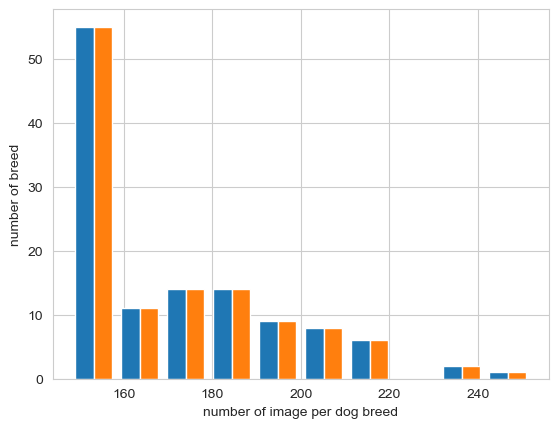

In [33]:
plt.hist(labels_total)
plt.xlabel('number of image per dog breed')
plt.ylabel('number of breed')
plt.show()

In [ ]:
#select breeds with more than 160 images


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create a new generator
imagegen = ImageDataGenerator()
# load train data
train = imagegen.flow_from_directory("imagenette2/train/", class_mode="categorical", shuffle=False, batch_size=128, target_size=(224, 224))
# load val data
test = imagegen.flow_from_directory("imagenette2/train/", class_mode="categorical", shuffle=False, batch_size=32, target_size=(224, 224))

In [ ]:
#TODO:
#1/ : Create the X_train array of shape ( num_samples, height, width, num_channels)
    #a):